In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import plotly.express as px
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.set_theme(context='talk', style='whitegrid', palette='pastel')
plt.rcParams['figure.figsize'] = 12, 8
plt.rcParams['savefig.format'] = 'pdf'
plt.rcParams['figure.autolayout'] = 'true'
plt.rcParams['figure.frameon'] = 'false'
plt.rcParams['axes.spines.left'] = 'false'
plt.rcParams['axes.spines.right'] = 'false'
plt.rcParams['axes.spines.top'] = 'false'
plt.rcParams['legend.fancybox'] = 'false'
plt.rcParams['axes.spines.bottom'] = 'false'
plt.rcParams['font.size'] = 20
plt.rcParams['font.weight'] = 'bold'

pd.set_option('display.max_columns', 60)

In [2]:
data = pd.read_excel('База Пермь.xlsx')
data.head()

,call_id,client_id,employee_id,offer_type,offer_time_sec,voice_offer_flag,application_flag,utilization_flag,utilization_dt,client_agree_flg,wait_time_sec,appeal_time_sec,employee_dialog_time_sec,repeated_appeal_flg,negative_flg,call_dttm,csat_score,transfer_flg,task_flg,problem_status_code,client_age,client_gender,client_education,сlient_city,marital_status_cd,children_cnt,foreign_flg,suppress_call_flg,suppress_email_flg,suppress_limit_flg,suppress_sms_flg,work_experience_day_cnt,employee_type,employee_city,employee_gender,business_line
0,c79272292fb4da61073f3948c91243a6,2c9a3f43e84fe978413591e3d2cfbb47,17fbc7a11e9791cfa3c8794766f91a62,Кредитная карта,NaN,0,0,0,NaN,NaN,0,379,261,0,0,2025-05-30 11:54:38,NaN,0,0,UNRESOLVED,35.0,F,NaN,NaN,UNM,NaN,0,0.0,0.0,NaN,NaN,176,ТК,Ростов-на-Дону,Женщина,Депозитные продукты
1,756cebcf56702596e720743aa9dbf2ad,09d2c607e767465feeadc967f900d02e,94ee713355b04da08a7ad09dcfb1fa3d,Кредитная карта,NaN,0,0,0,NaN,NaN,0,141,93,1,0,2025-05-20 20:17:44,NaN,0,0,NaN,60.0,M,NaN,Г КРАСНОДАР,NaN,NaN,0,0.0,0.0,NaN,0.0,1754,ГПД,г Калуга,Мужчина,Депозитные продукты
2,9cf572e8edb87a9bc5ae0be324e6659d,91beab05ed863ab7777450e2c9621465,6422a9613dd04d51537e6ceb38352586,Кредитная карта,NaN,0,0,0,NaN,NaN,0,142,114,0,1,2025-05-19 17:18:28,NaN,0,0,NaN,64.0,M,NaN,NaN,UNM,NaN,0,0.0,0.0,NaN,NaN,301,ПКЦ,Энгельс г,Женщина,Депозитные продукты
3,95631b3755d9e1e5b4dfb2168223aaa6,ceecfb6ce0ff8dda5af4077768bbdfda,6ceb678f204a96c4b9506c2556567b14,Кредитная карта,NaN,0,0,0,NaN,NaN,0,1771,1741,1,0,2025-05-24 22:02:47,NaN,0,0,NaN,18.0,M,NaN,Г ЮЖНО-САХАЛИНСК,NaN,NaN,0,0.0,0.0,NaN,NaN,622,ТК,NaN,Мужчина,Экосистемные обращения
4,82c5af9f8d5450f902c8b90b02529f0a,23c841702bb5fc589774d78f6a352159,09d17b542218ca16c2dac7eff23205a1,Дебетовая карта,NaN,0,0,0,NaN,NaN,0,261,211,0,0,2025-05-21 16:26:28,NaN,0,0,NaN,29.0,M,NaN,NaN,NaN,NaN,0,0.0,0.0,NaN,NaN,94,ТК,NaN,Женщина,Депозитные продукты


In [3]:
data.shape

(150000, 36)

## preprocessing

In [4]:
df = data.copy()

In [5]:
df = df.drop_duplicates(subset=['call_id'])
df = df[df['voice_offer_flag'] == 1].copy()
#df = df[df['employee_dialog_time_sec'] > 0].copy()
#df = df[df['employee_dialog_time_sec'] <= 20].copy()

In [20]:
df.shape

(40480, 40)

In [6]:
df['problem_status_code'].value_counts()

problem_status_code
UNRESOLVED    13035
RESOLVED      11057
Name: count, dtype: int64

/tmp/ipykernel_20121/1727423092.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


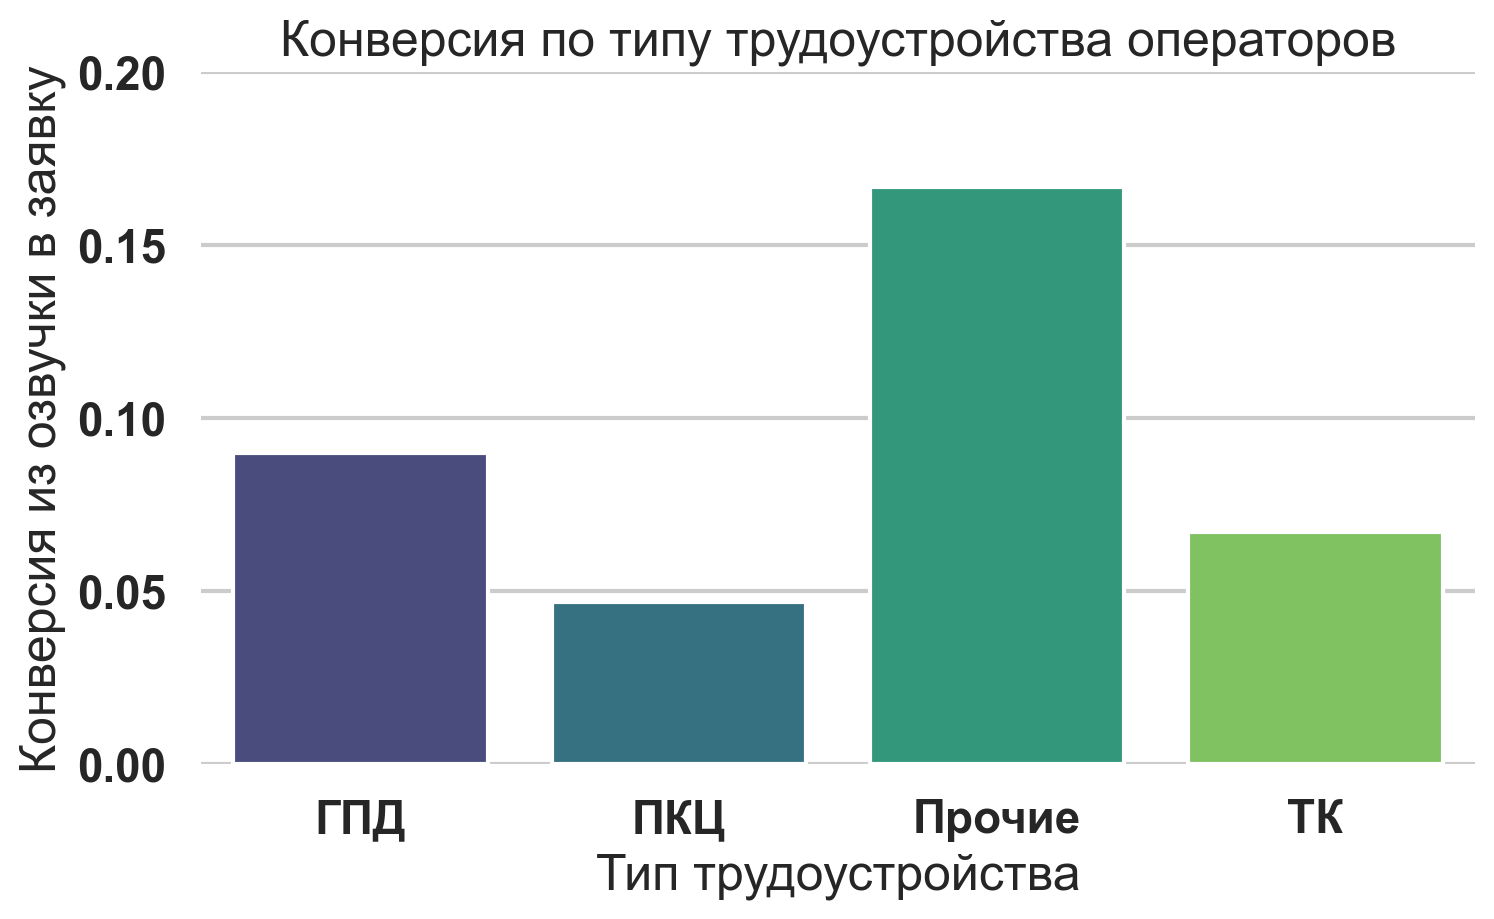

  employee_type  total_calls  conversions  conversion_rate
0           ГПД        10810          970         0.089732
1           ПКЦ         5921          276         0.046614
2        Прочие           18            3         0.166667
3            ТК        23731         1590         0.067001


In [7]:
employee_stats = (
    df.groupby("employee_type")
      .agg(
          total_calls=("application_flag", "count"),
          conversions=("application_flag", "sum")
      )
      .reset_index()
)

# Конверсия
employee_stats["conversion_rate"] = employee_stats["conversions"] / employee_stats["total_calls"]

# --- ГРАФИК ---
plt.figure(figsize=(8,5))
sns.barplot(
    data=employee_stats,
    x="employee_type",
    y="conversion_rate",
    palette="viridis"
)
plt.ylabel("Конверсия из озвучки в заявку")
plt.xlabel("Тип трудоустройства")
plt.title("Конверсия по типу трудоустройства операторов")
plt.ylim(0, employee_stats["conversion_rate"].max() * 1.2)  # чуть выше максимума для красоты
plt.show()

# Таблица для проверки
print(employee_stats)


/tmp/ipykernel_20121/4204291200.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


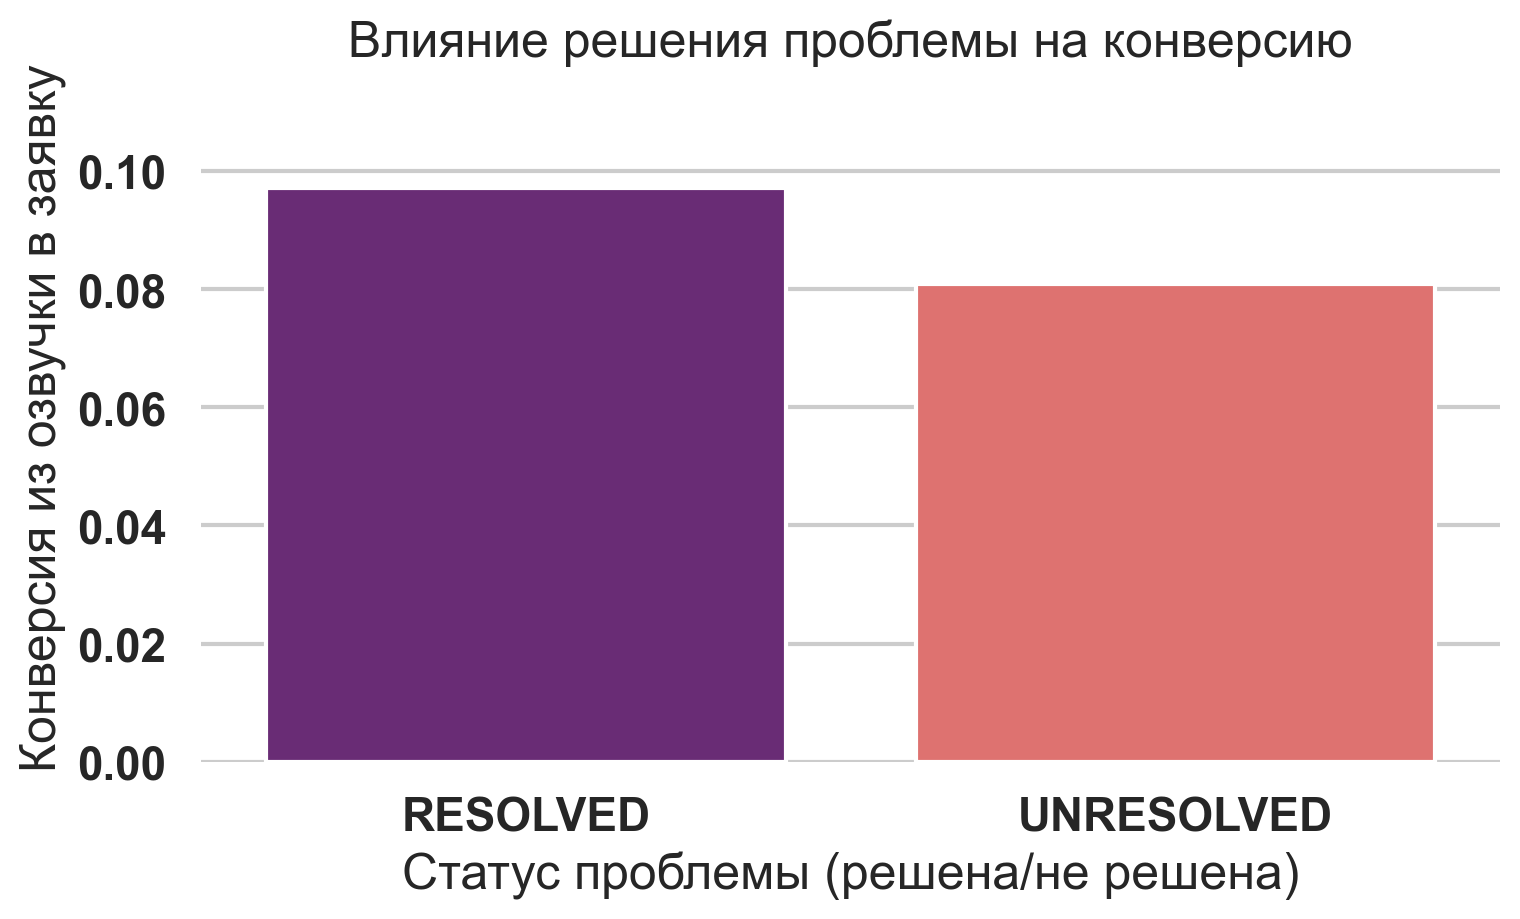

  problem_status_code  total_calls  conversions  conversion_rate
0            RESOLVED        11057         1074         0.097133
1          UNRESOLVED        13035         1055         0.080936


In [8]:
problem_stats = (
    df.groupby("problem_status_code")
      .agg(
          total_calls=("application_flag", "count"),
          conversions=("application_flag", "sum")
      )
      .reset_index()
)

problem_stats["conversion_rate"] = problem_stats["conversions"] / problem_stats["total_calls"]

plt.figure(figsize=(8,5))
sns.barplot(
    data=problem_stats,
    x="problem_status_code",
    y="conversion_rate",
    palette="magma"
)
plt.ylabel("Конверсия из озвучки в заявку")
plt.xlabel("Статус проблемы (решена/не решена)")
plt.title("Влияние решения проблемы на конверсию")
plt.ylim(0, problem_stats["conversion_rate"].max() * 1.2)
plt.show()

print(problem_stats)

In [9]:
import pandas as pd
from scipy.stats import ttest_ind

solved = df[df["problem_status_code"] == "RESOLVED"]["application_flag"]
not_solved = df[df["problem_status_code"] != "UNRESOLVED"]["application_flag"]

t_stat, p_value = ttest_ind(solved, not_solved, equal_var=False)  # Welch's t-test

print(f"T-статистика: {t_stat:.3f}")
print(f"P-значение: {p_value:.5f}")

if p_value < 0.05:
    print("Разница в конверсии между решёнными и нерешёнными проблемами статистически значима.")
else:
    print("Разница в конверсии статистически незначима.")


T-статистика: 10.087
P-значение: 0.00000
Разница в конверсии между решёнными и нерешёнными проблемами статистически значима.


In [10]:
n_iterations = 1000
sample_size = 5000
p_values = []

for i in range(n_iterations):
    solved_sample = solved.sample(n=sample_size, replace=True)
    not_solved_sample = not_solved.sample(n=sample_size, replace=True)
    
    t_stat, p_val = ttest_ind(solved_sample, not_solved_sample, equal_var=False)
    p_values.append(p_val)

p_values = np.array(p_values)

significant_ratio = (p_values < 0.05).mean()

print(f"Среднее p-значение по подвыборкам: {p_values.mean():.5f}")
print(f"Доля подвыборок с p < 0.05: {significant_ratio*100:.2f}%")


Среднее p-значение по подвыборкам: 0.00002
Доля подвыборок с p < 0.05: 100.00%


/tmp/ipykernel_20121/2785770218.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["experience_group", "resolved_flag"])


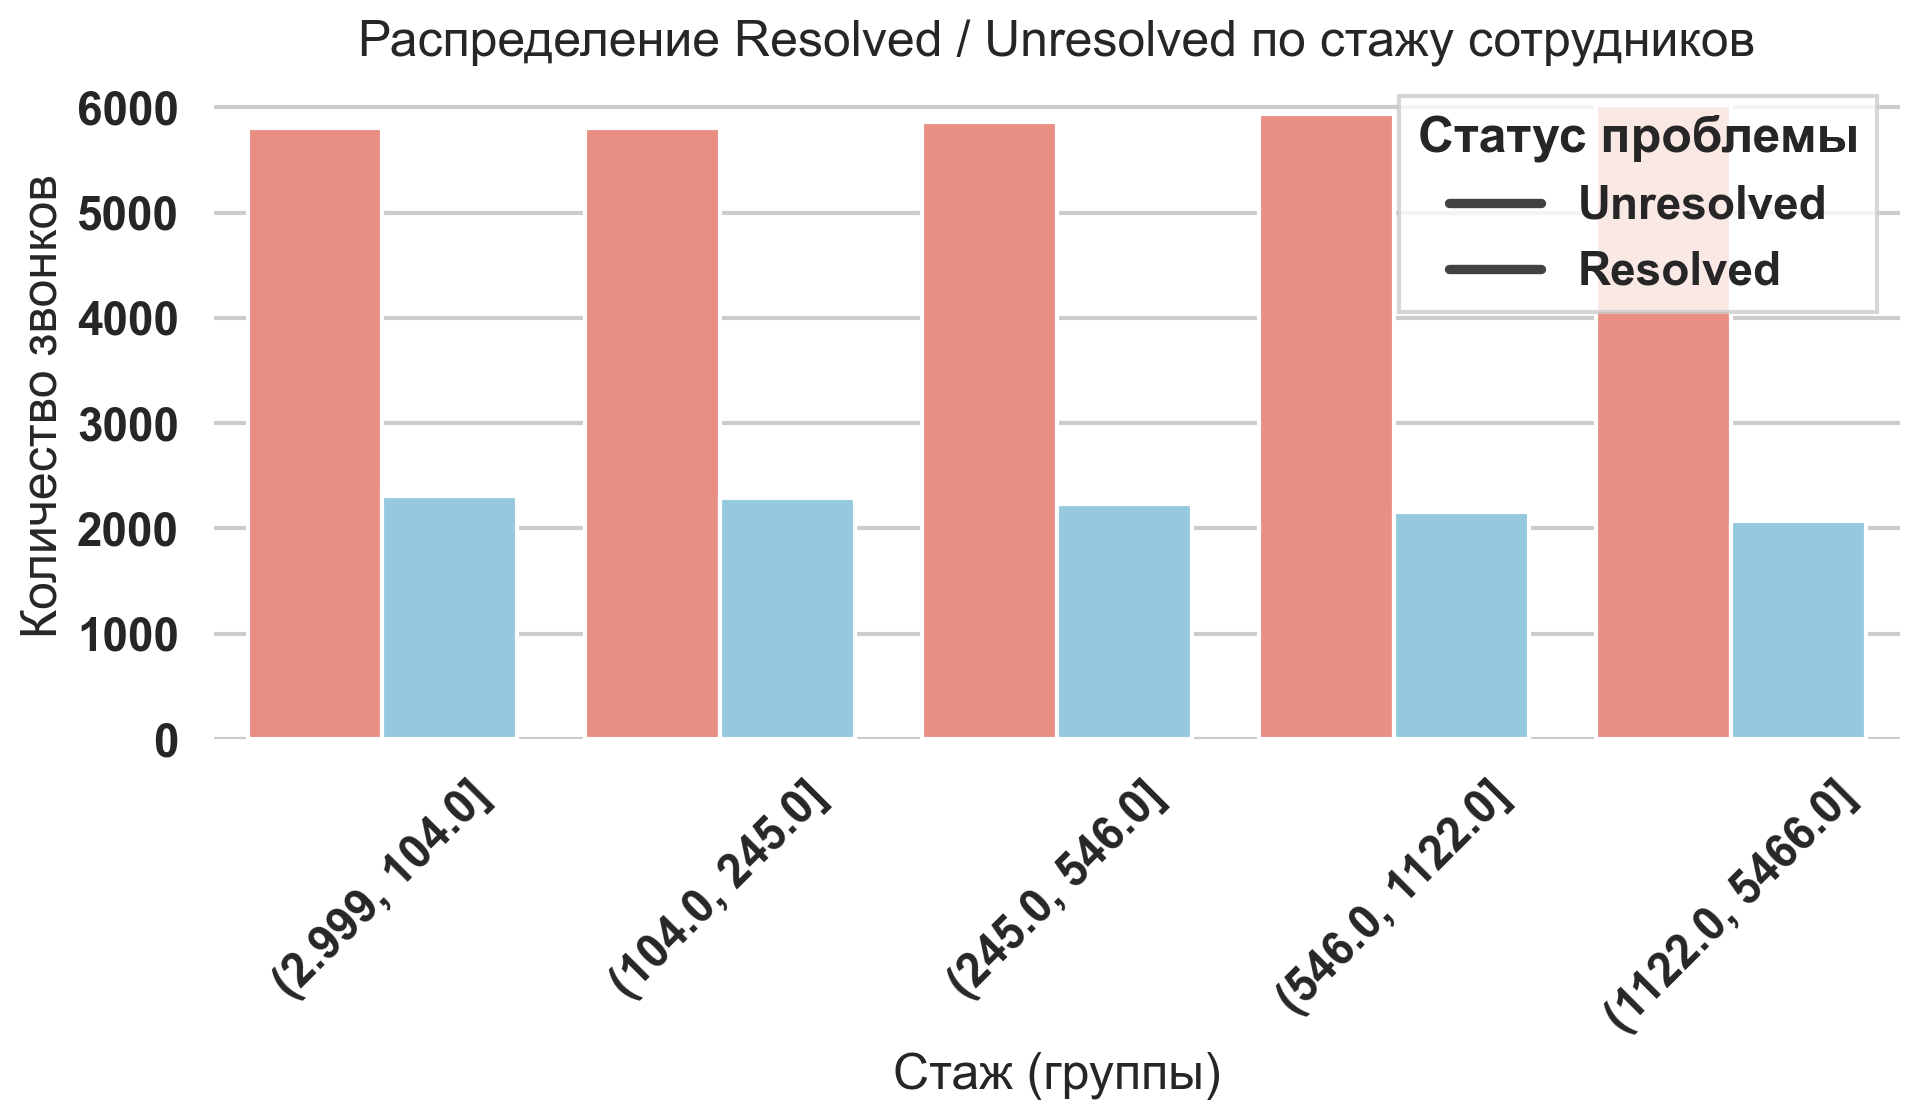

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Целевая переменная (флаг resolved)
df["resolved_flag"] = (df["problem_status_code"] == "RESOLVED").astype(int)

# --- 1) Разделим стаж на группы (например, 5 квантилей)
df["experience_group"] = pd.qcut(df["work_experience_day_cnt"], q=5, duplicates="drop")

# --- 2) Посчитаем распределение RESOLVED / UNRESOLVED
stats = (
    df.groupby(["experience_group", "resolved_flag"])
      .size()
      .reset_index(name="count")
)

# --- 3) График
plt.figure(figsize=(10,6))
sns.barplot(
    data=stats,
    x="experience_group",
    y="count",
    hue="resolved_flag",
    palette=["salmon", "skyblue"]
)

plt.xlabel("Стаж (группы)")
plt.ylabel("Количество звонков")
plt.title("Распределение Resolved / Unresolved по стажу сотрудников")
plt.xticks(rotation=45)
plt.legend(title="Статус проблемы", labels=["Unresolved", "Resolved"])
plt.show()



0:	total: 56.9ms	remaining: 17s
100:	total: 333ms	remaining: 656ms
200:	total: 521ms	remaining: 256ms
299:	total: 706ms	remaining: 0us
                Feature Id  Importances
0  work_experience_day_cnt        100.0


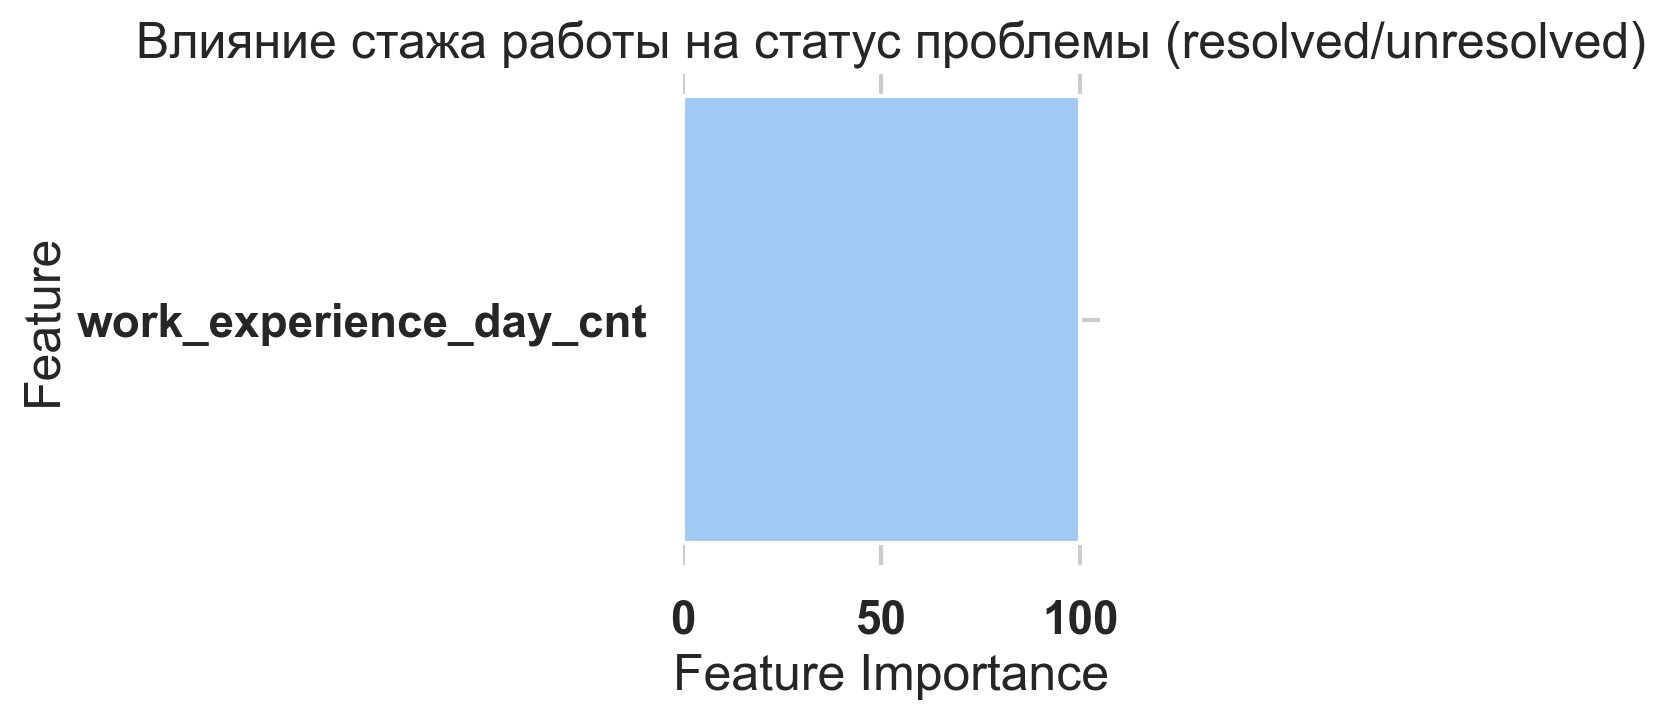

In [12]:
import pandas as pd
from catboost import CatBoostClassifier, Pool
import matplotlib.pyplot as plt

# Целевая переменная: RESOLVED = 1, UNRESOLVED = 0
df["target"] = (df["problem_status_code"] == "RESOLVED").astype(int)

# Берём только стаж работы
features = ["work_experience_day_cnt"]
X = df[features].fillna(-1)  # заменим NaN на -1
y = df["target"]

# Обучение CatBoost
model = CatBoostClassifier(
    iterations=300,
    depth=5,
    learning_rate=0.1,
    loss_function="Logloss",
    eval_metric="AUC",
    random_seed=42,
    verbose=100
)

pool = Pool(X, y)
model.fit(pool)

# Важность признаков
importances = model.get_feature_importance(prettified=True)
print(importances)

# Визуализация
plt.figure(figsize=(6,4))
plt.barh(importances["Feature Id"], importances["Importances"])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Влияние стажа работы на статус проблемы (resolved/unresolved)")
plt.show()



логит рег


In [13]:
# import pandas as pd
# from catboost import CatBoostRegressor, Pool
# import matplotlib.pyplot as plt

# # ---------------------------
# # 1️⃣ Подготовка признаков
# # ---------------------------

# # Пример: список категориальных фич (замени на свои, если нужно)
# categorical_features = [
#     'offer_type', 
#     'employee_type', 'employee_gender', 'business_line',
#     'client_gender', 'client_education', 'repeated_appeal_flg',
#     'negative_flg', 'transfer_flg', 'task_flg', 'problem_status_code',
#     'foreign_flg'
# ]

# # Заполняем NaN для категориальных признаков
# for col in categorical_features:
#     df[col] = df[col].fillna('missing').astype(str)

# # Числовые признаки
# features = [c for c in df.columns if c not in ['cost_per_application', 'employee_id', 'client_id', 'call_id']]
# numeric_features = [f for f in features if f not in categorical_features]

# # Заполняем NaN для числовых признаков медианой
# for col in numeric_features:
#     df[col] = df[col].fillna(df[col].median())

# # Целевая переменная
# y = df['cost_per_application']
# X = df[features]

# # ---------------------------
# # 2️⃣ Создание и обучение модели
# # ---------------------------

# model = CatBoostRegressor(
#     iterations=1000,
#     learning_rate=0.05,
#     depth=6,
#     loss_function='RMSE',
#     eval_metric='RMSE',
#     random_seed=42,
#     verbose=100
# )

# # CatBoost Pool
# pool = Pool(X, y, cat_features=categorical_features)

# # Обучение модели
# model.fit(pool)

# # ---------------------------
# # 3️⃣ Важность признаков
# # ---------------------------

# feature_importances = model.get_feature_importance(pool)
# importance_df = pd.DataFrame({
#     'feature': features,
#     'importance': feature_importances
# }).sort_values(by='importance', ascending=False)

# # ---------------------------
# # 4️⃣ Визуализация важности
# # ---------------------------

# plt.figure(figsize=(12, 6))
# plt.barh(importance_df['feature'], importance_df['importance'], color='skyblue')
# plt.gca().invert_yaxis()
# plt.xlabel('Importance')
# plt.title('Feature importance для cost_per_application')
# plt.show()

# # ---------------------------
# # 5️⃣ Таблица важности для проверки
# # ---------------------------

# print(importance_df)


/tmp/ipykernel_20121/2437938326.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("employee_dialog_time_sec_group")


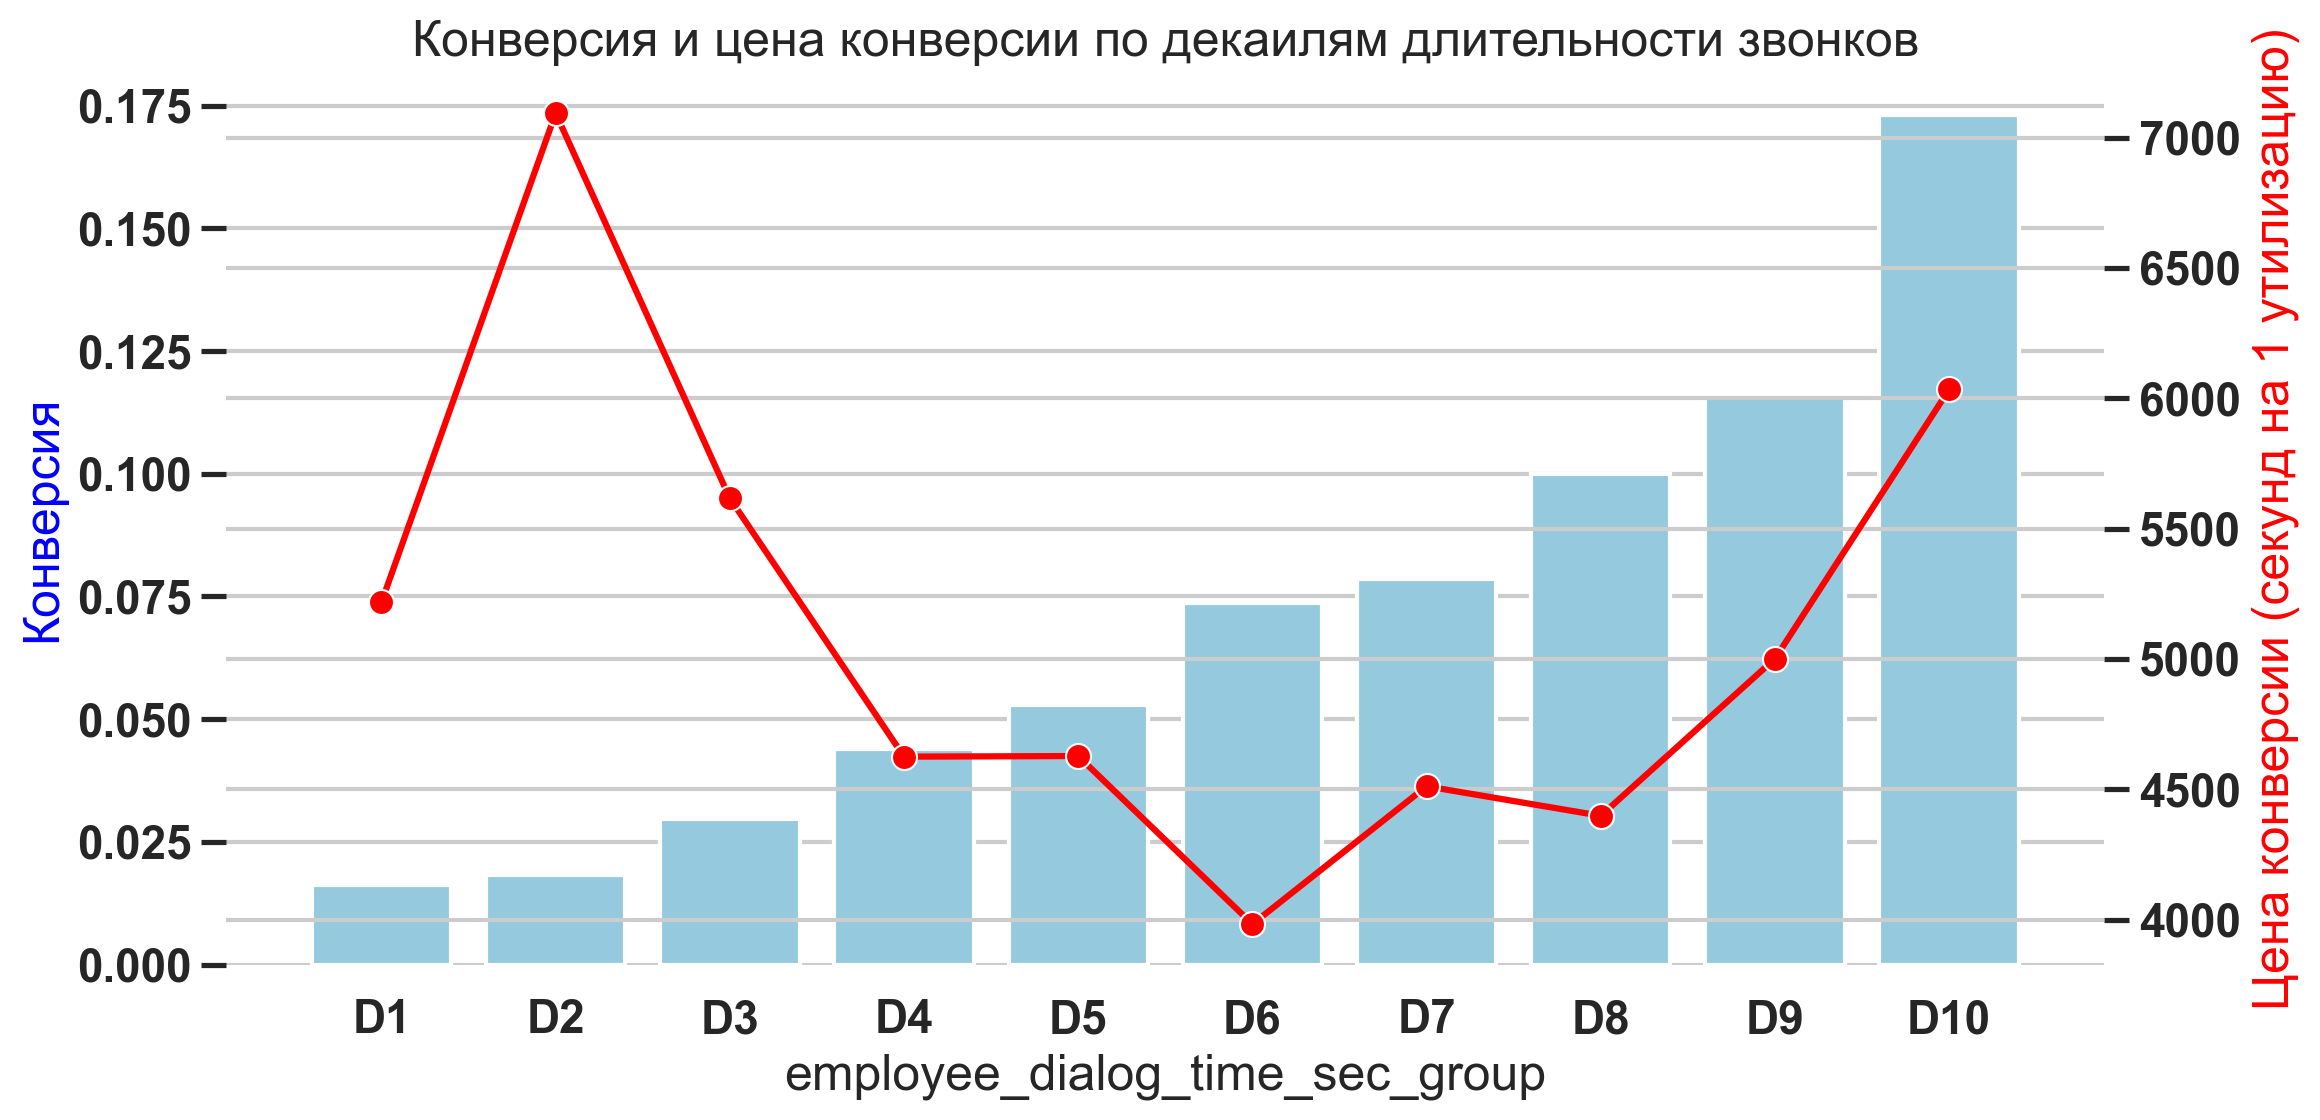

  employee_dialog_time_sec_group  total_calls  conversions  conversion_rate  \
0                             D1         4060           66         0.016256   
1                             D2         4096           75         0.018311   
2                             D3         4079          121         0.029664   
3                             D4         3975          175         0.044025   
4                             D5         4040          214         0.052970   
5                             D6         4085          301         0.073684   
6                             D7         4043          318         0.078654   
7                             D8         4010          401         0.100000   
8                             D9         4047          468         0.115641   
9                            D10         4045          700         0.173053   

   cost_per_conversion  
0          5217.803030  
1          7093.640000  
2          5616.421488  
3          4625.262857  
4    

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Разбивка на 10 квантилей (децили) с удалением дубликатов границ
df["employee_dialog_time_sec_group"] = pd.qcut(
    df["employee_dialog_time_sec"],
    q=10,
    labels=[f"D{i+1}" for i in range(10)],
)

# Считаем статистику по декаилям
stats = (
    df.groupby("employee_dialog_time_sec_group")
      .agg(
          total_calls=("application_flag", "count"),
          conversions=("application_flag", "sum"),
          avg_duration=("employee_dialog_time_sec", "mean")
      )
      .reset_index()
)

# Конверсия (%)
stats["conversion_rate"] = stats["conversions"] / stats["total_calls"]

# Цена конверсии (среднее время на одну утилизацию)
stats["cost_per_conversion"] = stats["avg_duration"] / stats["conversion_rate"]

# --- ГРАФИК ---
fig, ax1 = plt.subplots(figsize=(12, 6))

# Барплот конверсии
sns.barplot(
    data=stats, x="employee_dialog_time_sec_group", y="conversion_rate",
    ax=ax1, color="skyblue"
)
ax1.set_ylabel("Конверсия", color="blue")

# Линия — цена конверсии
ax2 = ax1.twinx()
sns.lineplot(
    data=stats, x="employee_dialog_time_sec_group", y="cost_per_conversion",
    ax=ax2, color="red", marker="o"
)
ax2.set_ylabel("Цена конверсии (секунд на 1 утилизацию)", color="red")

plt.title("Конверсия и цена конверсии по декаилям длительности звонков")
plt.show()

# Таблица для проверки
print(stats[["employee_dialog_time_sec_group", "total_calls", "conversions",
             "conversion_rate", "cost_per_conversion"]])



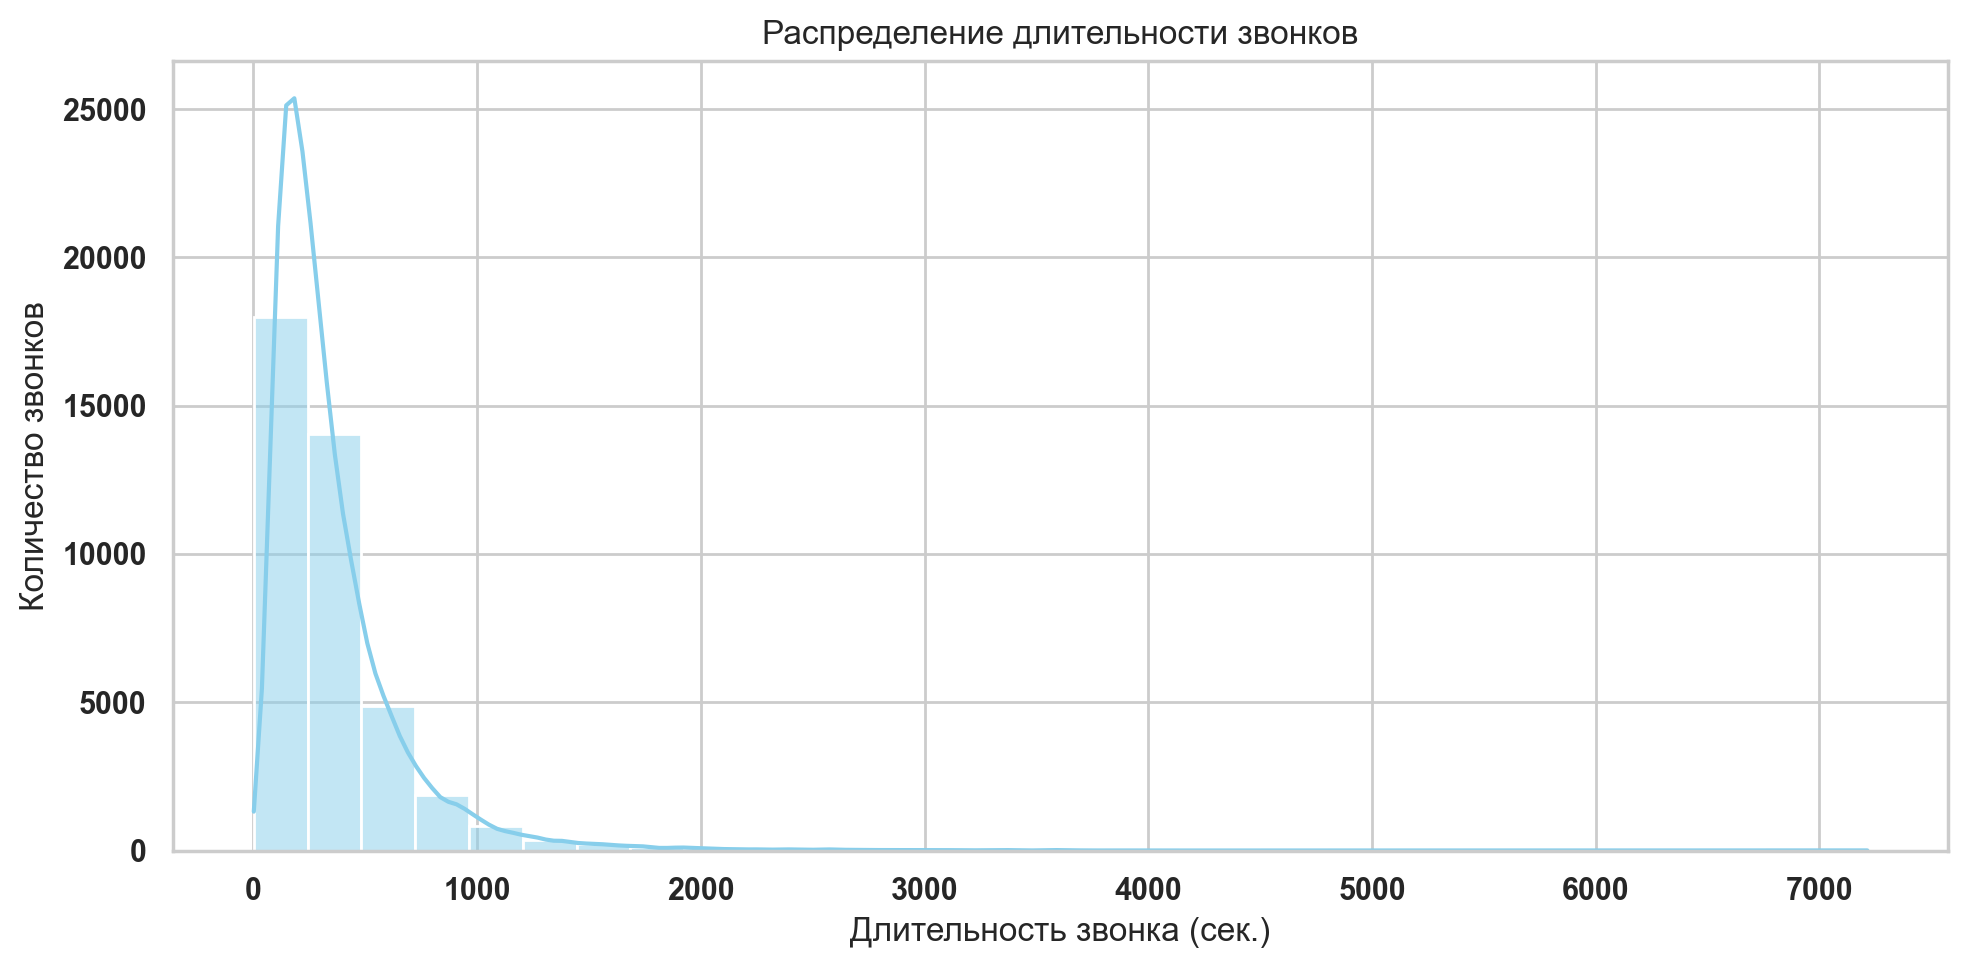

Статистика по первому децилю (D1):
count    40480.000000
mean       353.685178
std        303.919321
min          2.000000
25%        166.000000
50%        267.000000
75%        437.000000
100%      7214.000000
max       7214.000000
Name: employee_dialog_time_sec, dtype: float64


In [19]:
# Фильтруем первый дециль
d1_data = df["employee_dialog_time_sec"]

# График распределения
plt.figure(figsize=(10,5))
sns.histplot(d1_data, bins=30, kde=True, color="skyblue")
plt.xlabel("Длительность звонка (сек.)")
plt.ylabel("Количество звонков")
plt.title("Распределение длительности звонков")
plt.show()

# Покажем основные статистики
print("Статистика по первому децилю (D1):")
print(d1_data.describe(percentiles=[0.25, 0.5, 0.75, 1]))


/tmp/ipykernel_20121/1418353041.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("employee_dialog_time_sec_group")


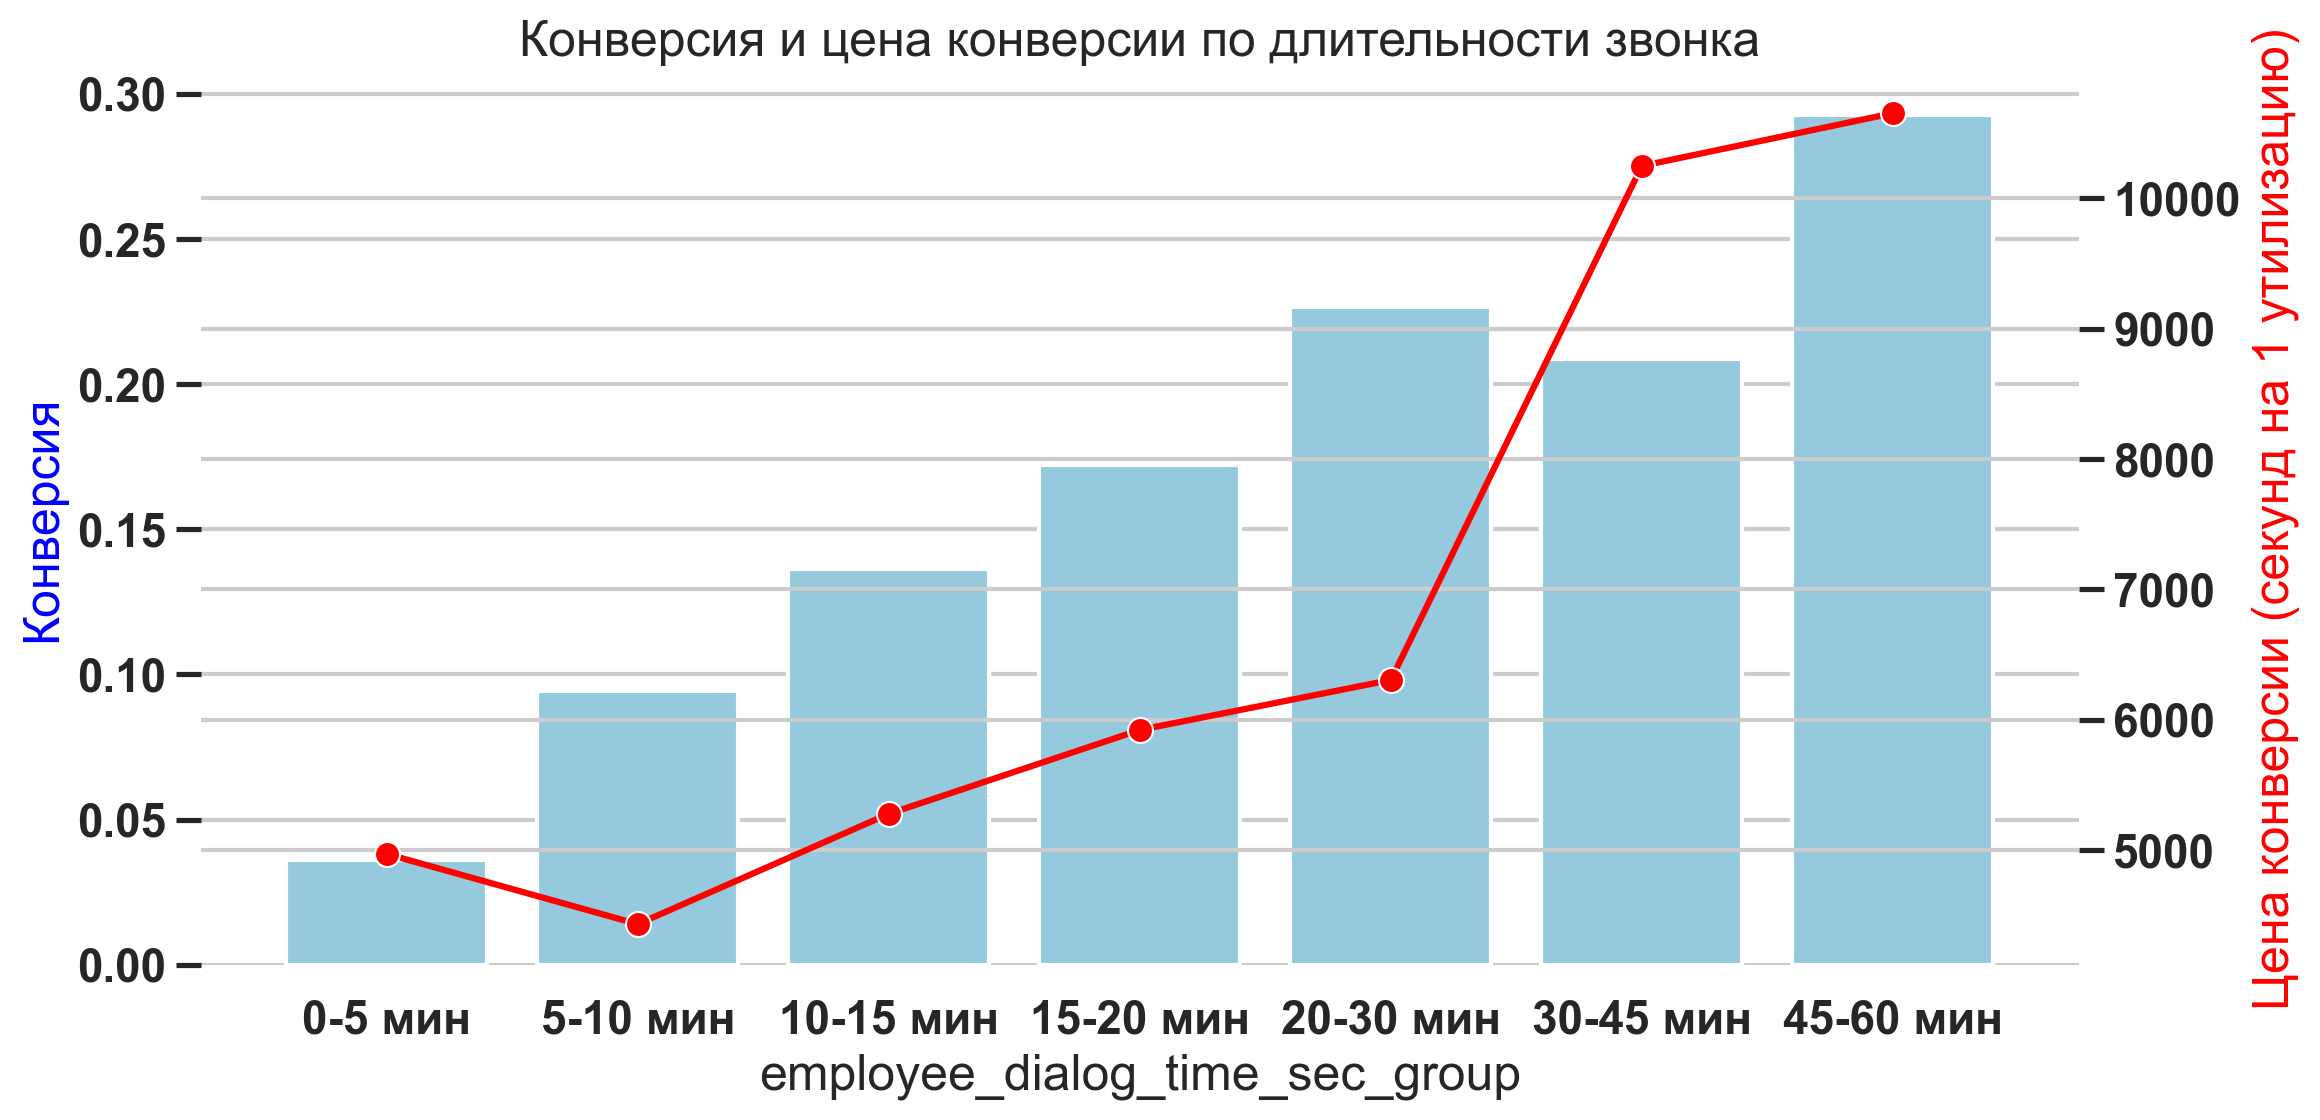

  employee_dialog_time_sec_group  total_calls  conversions  conversion_rate  \
0                        0-5 мин        22805          821         0.036001   
1                       5-10 мин        12176         1147         0.094202   
2                      10-15 мин         3437          469         0.136456   
3                      15-20 мин         1184          204         0.172297   
4                      20-30 мин          649          147         0.226502   
5                      30-45 мин          182           38         0.208791   
6                      45-60 мин           41           12         0.292683   

   cost_per_conversion  
0          4969.591961  
1          4431.318221  
2          5277.584222  
3          5921.372549  
4          6304.836735  
5         10249.736842  
6         10654.333333  


In [16]:


# Границы групп длительности звонков (в секундах)
bins = [0, 300, 600, 900, 1200, 1800, 2700, 3600]
labels = ["0-5 мин", "5-10 мин", "10-15 мин", "15-20 мин",
          "20-30 мин", "30-45 мин", "45-60 мин"]

# Добавляем категориальную колонку с группой длительности
df["employee_dialog_time_sec_group"] = pd.cut(
    df["employee_dialog_time_sec"], bins=bins, labels=labels, right=False
)

# Считаем статистику по группам
stats = (
    df.groupby("employee_dialog_time_sec_group")
      .agg(
          total_calls=("application_flag", "count"),
          conversions=("application_flag", "sum"),
          avg_duration=("employee_dialog_time_sec", "mean")
      )
      .reset_index()
)

# Конверсия (%)
stats["conversion_rate"] = stats["conversions"] / stats["total_calls"]

# Цена конверсии (среднее время на одну утилизацию)
stats["cost_per_conversion"] = stats["avg_duration"] / stats["conversion_rate"]

# Упорядочиваем категории
stats["employee_dialog_time_sec_group"] = pd.Categorical(
    stats["employee_dialog_time_sec_group"], categories=labels, ordered=True
)
stats = stats.sort_values("employee_dialog_time_sec_group")

# Строим график
fig, ax1 = plt.subplots(figsize=(12, 6))

# Барплот конверсии
sns.barplot(
    data=stats, x="employee_dialog_time_sec_group", y="conversion_rate",
    ax=ax1, color="skyblue"
)
ax1.set_ylabel("Конверсия", color="blue")

# Линия — цена конверсии
ax2 = ax1.twinx()
sns.lineplot(
    data=stats, x="employee_dialog_time_sec_group", y="cost_per_conversion",
    ax=ax2, color="red", marker="o"
)
ax2.set_ylabel("Цена конверсии (секунд на 1 утилизацию)", color="red")

plt.title("Конверсия и цена конверсии по длительности звонка")
plt.show()

# Выводим таблицу для наглядности
print(stats[["employee_dialog_time_sec_group", "total_calls", "conversions",
             "conversion_rate", "cost_per_conversion"]])


/tmp/ipykernel_20121/2973685644.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_voice.groupby('call_duration_group')


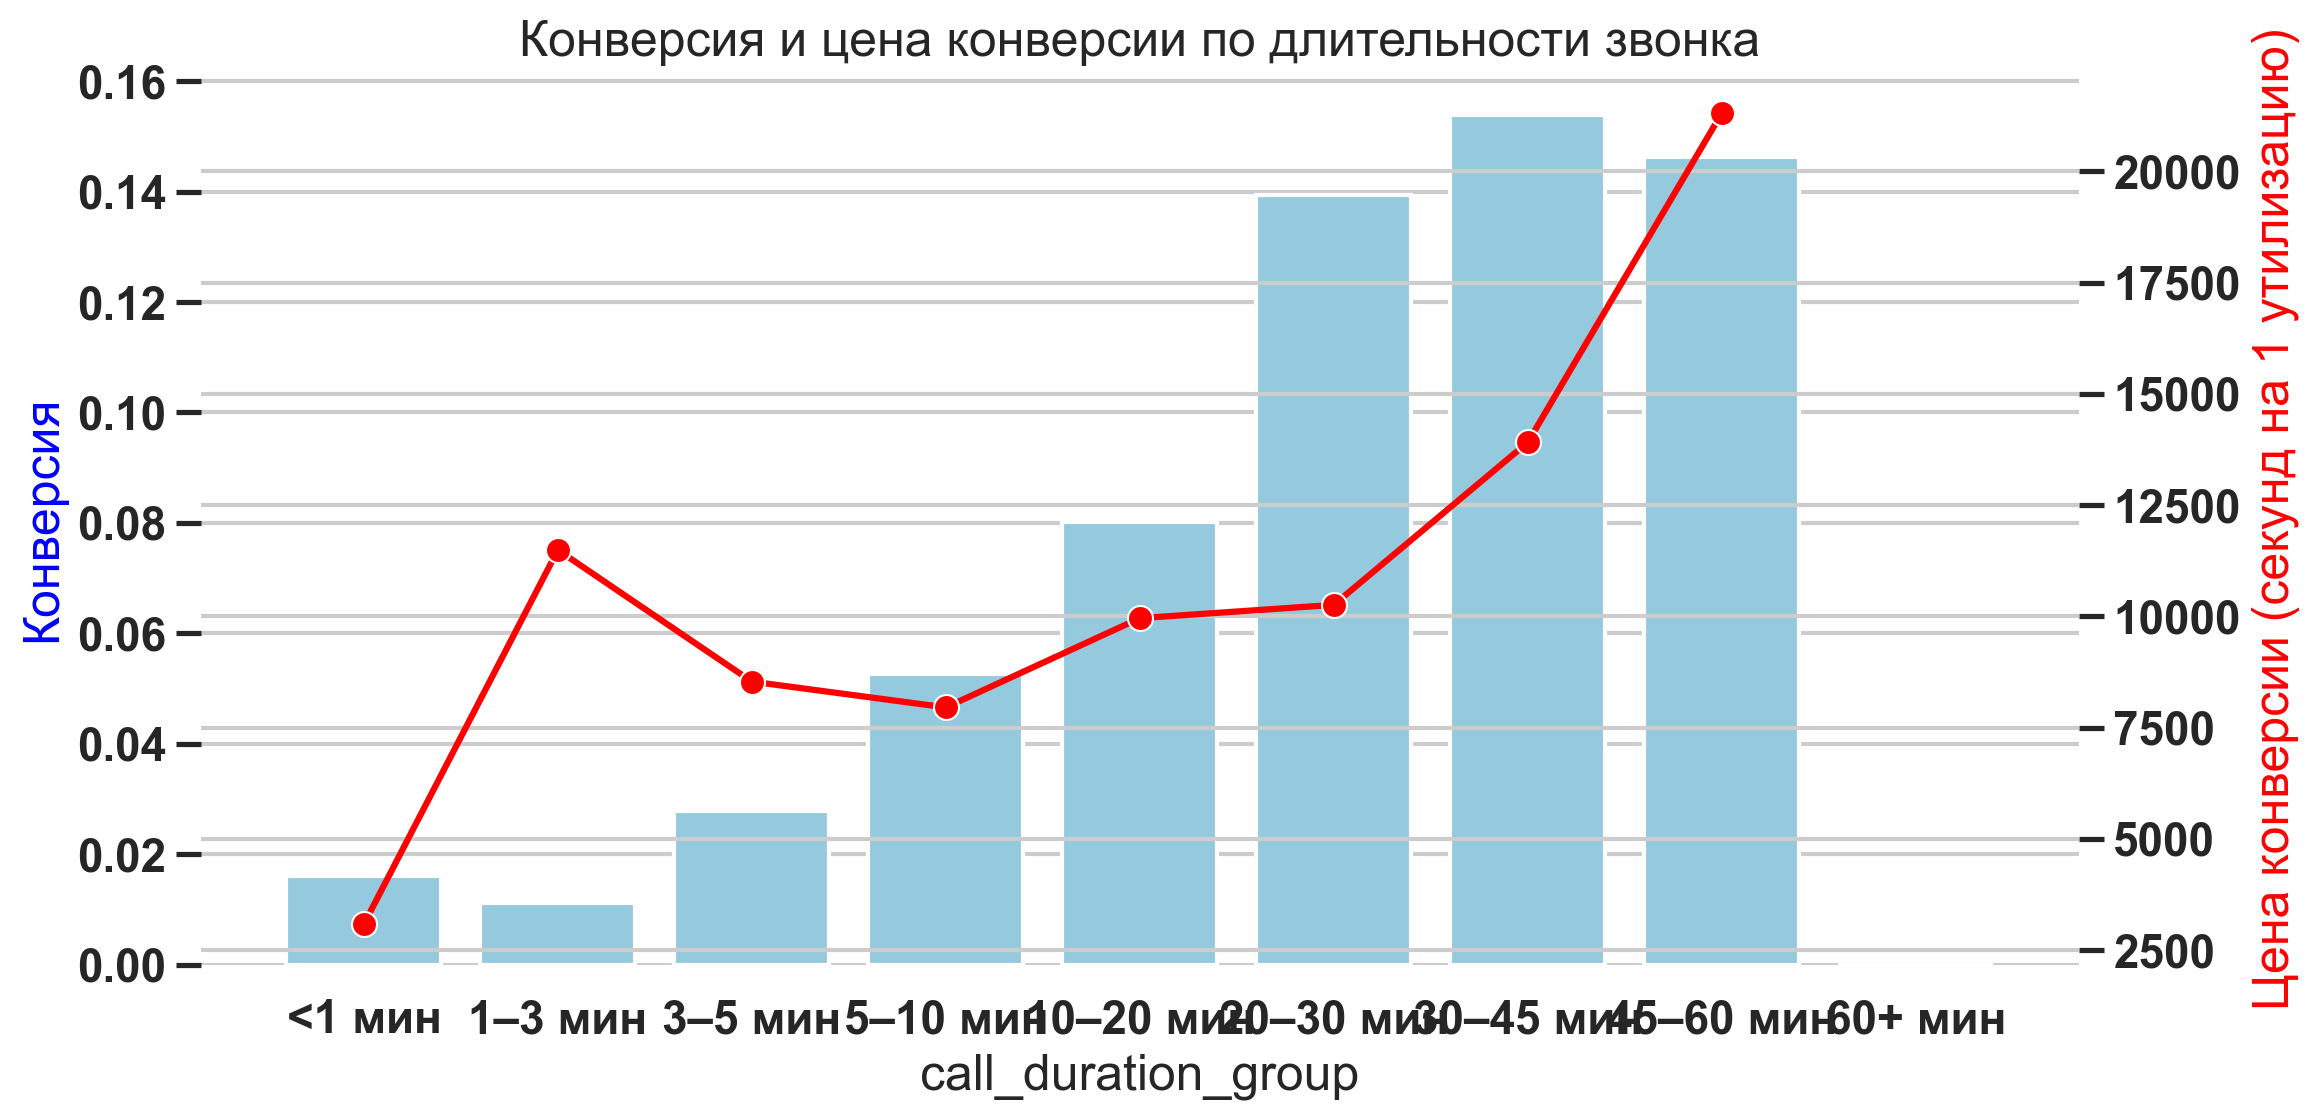

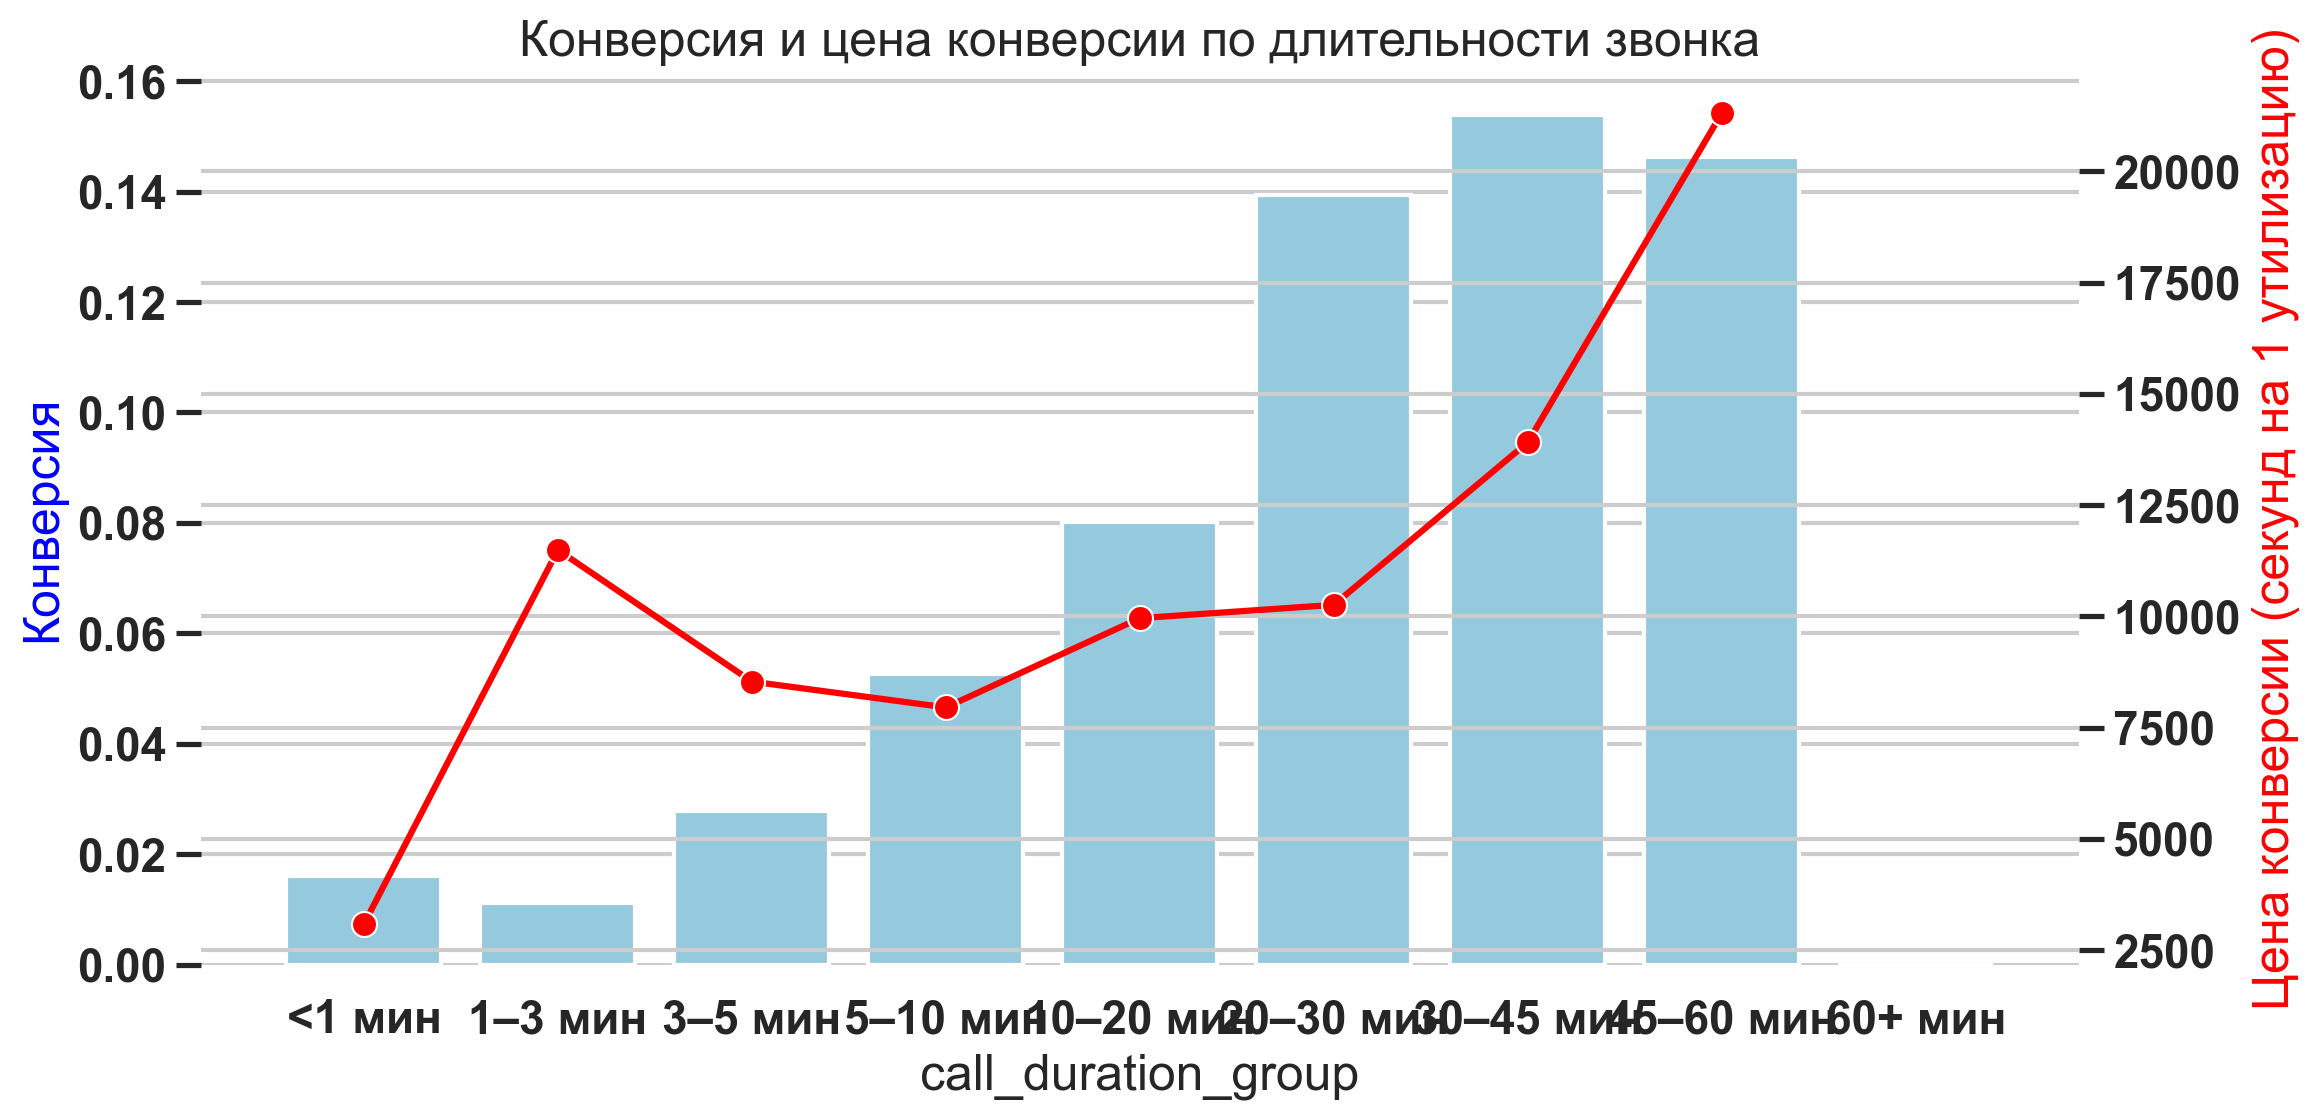

In [17]:
# Берем только звонки с озвучкой оффера
df_voice = df[df['voice_offer_flag'] == 1].copy()

# Группируем по длительности звонка (те же категории, что раньше)
bins = [0, 60, 180, 300, 600, 1200, 1800, 2700, 3600, 99999]  
labels = [
    '<1 мин', '1–3 мин', '3–5 мин', '5–10 мин', 
    '10–20 мин', '20–30 мин', '30–45 мин', 
    '45–60 мин', '60+ мин'
]

df_voice['call_duration_group'] = pd.cut(df_voice['employee_dialog_time_sec'], bins=bins, labels=labels)

# Считаем конверсию и цену конверсии
stats = (
    df_voice.groupby('call_duration_group')
    .agg(
        calls=('utilization_flag', 'count'),
        conversions=('utilization_flag', 'sum'),
        total_time=('employee_dialog_time_sec', 'sum')
    )
    .reset_index()
)

# Конверсия
stats['conversion_rate'] = stats['conversions'] / stats['calls']

# Цена конверсии (среднее время на 1 успешную утилизацию)
stats['cost_per_conversion'] = stats['total_time'] / stats['conversions']

# Сначала сортируем по заданному порядку
stats['call_duration_group'] = pd.Categorical(
    stats['call_duration_group'], categories=labels, ordered=True
)
stats = stats.sort_values('call_duration_group')

stats["call_duration_group"] = pd.Categorical(
    stats["call_duration_group"], categories=labels, ordered=True
)

fig, ax1 = plt.subplots(figsize=(12,6))

# Барплот (конверсия)
sns.barplot(
    data=stats, x='call_duration_group', y='conversion_rate',
    ax=ax1, color="skyblue"
)
ax1.set_ylabel("Конверсия", color="blue")

# Линейный график (цена конверсии)
ax2 = ax1.twinx()
sns.lineplot(
    data=stats, x='call_duration_group', y='cost_per_conversion',
    ax=ax2, color="red", marker="o"
)
ax2.set_ylabel("Цена конверсии (секунд на 1 утилизацию)", color="red")

plt.title("Конверсия и цена конверсии по длительности звонка")
plt.show()


# Визуализация
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax1 = plt.subplots(figsize=(12,6))

# Конверсия
sns.barplot(data=stats, x='call_duration_group', y='conversion_rate', ax=ax1, order=labels, color="skyblue")
ax1.set_ylabel("Конверсия", color="blue")

# Цена конверсии (вторая ось)
ax2 = ax1.twinx()
sns.lineplot(data=stats, x='call_duration_group', y='cost_per_conversion', ax=ax2, color="red", marker="o")
ax2.set_ylabel("Цена конверсии (секунд на 1 утилизацию)", color="red")

plt.title("Конверсия и цена конверсии по длительности звонка")
plt.show()



            business_line                 offer_type  conversion
0                  Mobile           Цифровой профиль    0.100000
1            Premium Банк            Кредитная карта    0.035714
2                     SME            Кредитная карта    0.250000
3     Депозитные продукты  Страхование задолженности    0.080416
4              Инвестиции            Дебетовая карта    0.100000
5      Кредитные продукты            Дебетовая карта    0.107364
6   Нефинансовые продукты  Страхование задолженности    0.307692
7  Экосистемные обращения  Страхование задолженности    0.075949
8              нет данных  Страхование задолженности    0.193833


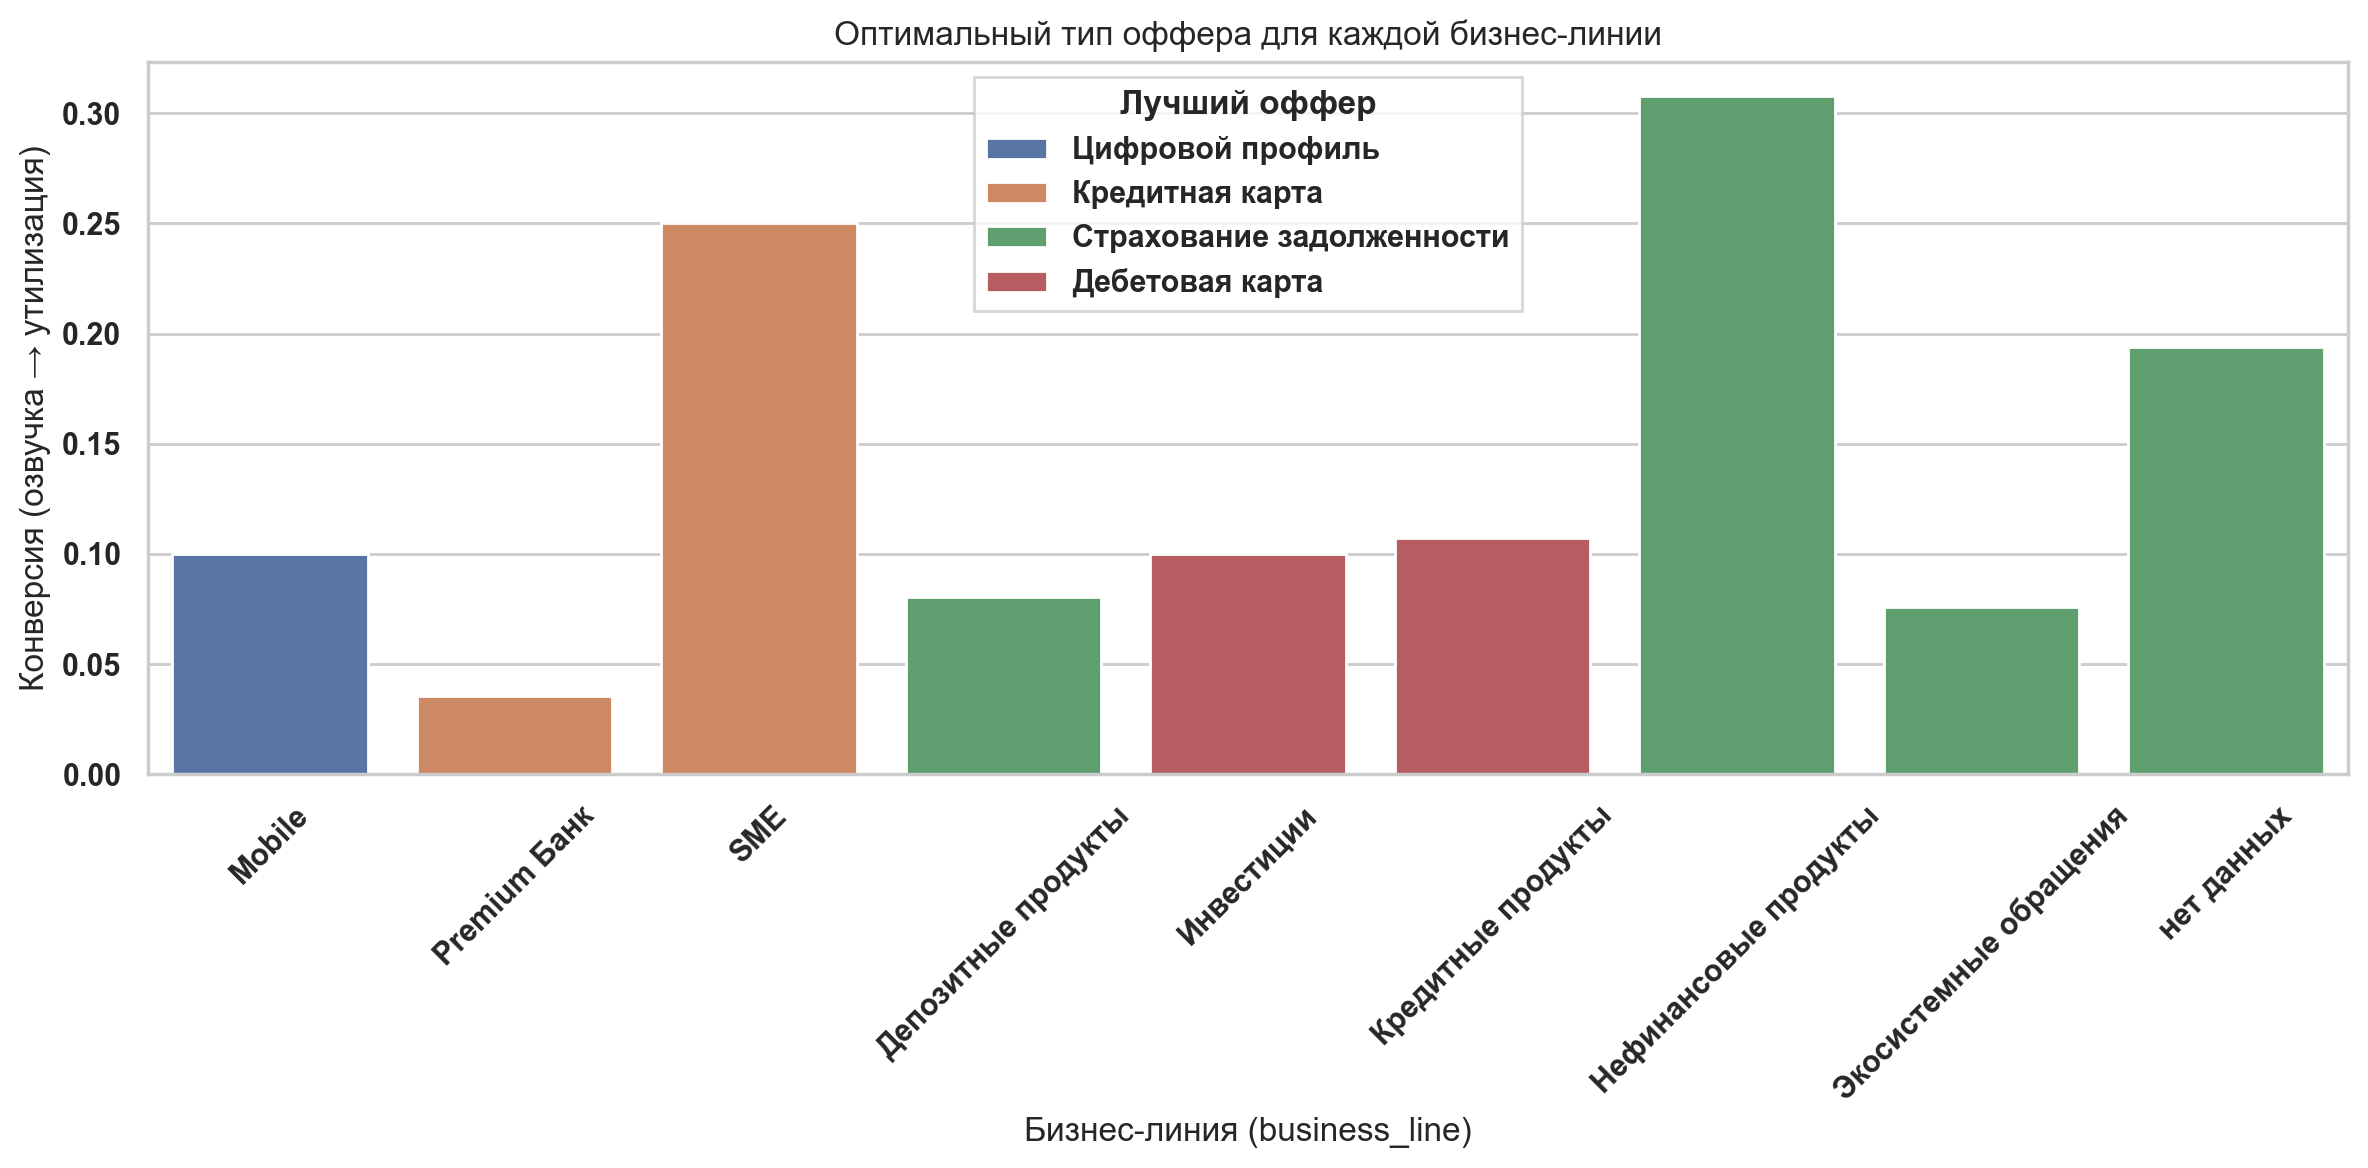

In [18]:
sns.set(style="whitegrid")

df_voice = df[df['voice_offer_flag'] == 1].copy()

conv_by_bl_offer = (
    df_voice.groupby(['business_line', 'offer_type'])['utilization_flag']
    .mean()
    .reset_index()
)

conv_by_bl_offer.rename(columns={'utilization_flag': 'conversion'}, inplace=True)

best_offer_by_bl = conv_by_bl_offer.loc[
    conv_by_bl_offer.groupby('business_line')['conversion'].idxmax()
].reset_index(drop=True)

print(best_offer_by_bl)

plt.figure(figsize=(12,6))
sns.barplot(data=best_offer_by_bl, x='business_line', y='conversion', hue='offer_type')
plt.title("Оптимальный тип оффера для каждой бизнес-линии")
plt.xlabel("Бизнес-линия (business_line)")
plt.ylabel("Конверсия (озвучка → утилизация)")
plt.xticks(rotation=45)
plt.legend(title="Лучший оффер")
plt.show()


